In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import html
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io

In [ ]:
def jsob_to_image(js_object):
  # decode base64 image
  image_bytes = b64decode(js_object.split(',')[1])
  # convert bytes to numpy array
  img_array = np.frombuffer(image_bytes, dtype=np.uint8)
  # convert numpy array into OpenCV BGR
  frame = cv2.imdecode(img_array, flags=1)

  return frame

In [ ]:
from keras.models import load_model

class_map = {0: '1', 1: '3', 2: '4', 3: '5', 4: '7', 5: '8', 6: '9', 7: 'A', 8: 'B', 9: 'Baby', 10: 'Brother', 11: 'C', 12: 'D', 13: 'Dont_like', 14: 'E', 15: 'F', 16: 'Friend', 17: 'G', 18: 'H', 19: 'Help', 20: 'House', 21: 'I', 22: 'J', 23: 'K', 24: 'L', 25: 'Like', 26: 'Love', 27: 'M', 28: 'Make', 29: 'More', 30: 'N', 31: 'Name', 32: 'No', 33: 'O_OR_0', 34: 'P', 35: 'Pay', 36: 'Play', 37: 'Q', 38: 'R', 39: 'S', 40: 'Stop', 41: 'T', 42: 'U', 43: 'V_OR_2', 44: 'W_OR_6', 45: 'With', 46: 'X', 47: 'Y', 48: 'Yes', 49: 'Z', 50: 'nothing'}

In [ ]:
model = load_model("/content/drive/MyDrive/sign_lang/model_inc.h5", compile=False)

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt

def generate_predictions(test_img):

    # test_img = test_img.resize((200,200))
    # test_img = tf.keras.utils.load_img(test_image_path, target_size=(200, 200))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_category = class_map[predicted_label]

    print(predicted_category)



In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


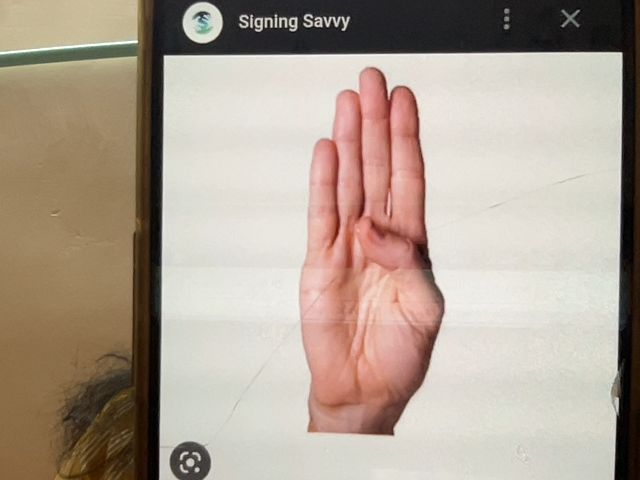

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
test_img = tf.keras.utils.load_img('/content/photo.jpg', target_size=(200, 200))
generate_predictions(test_img)

1/1 [==============================] - 0s 127ms/step
B


<IPython.core.display.Javascript object>

Saved to photo.jpg


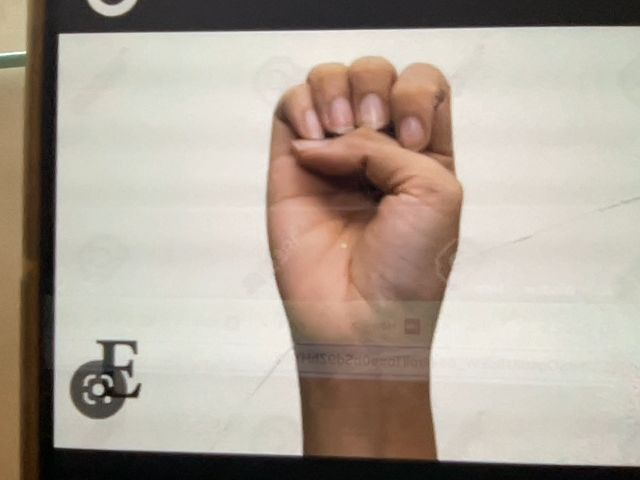

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
test_img = tf.keras.utils.load_img('/content/photo.jpg', target_size=(200, 200))
generate_predictions(test_img)

1/1 [==============================] - 0s 123ms/step
E
